In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import cv2

In [4]:
cat=cv2.imread('C:\\Users\\hinaa\\Documents\\ML_Projects\\cats_dogs\\training_set\\training_set\\cats\\cat.10.jpg')

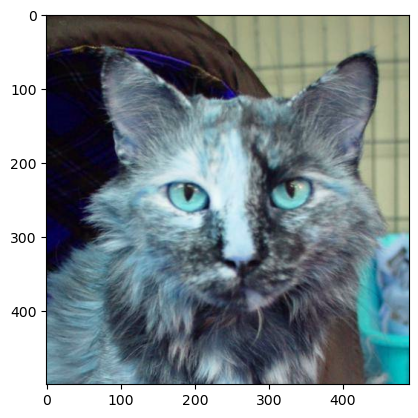

In [5]:
plt.imshow(cat)

In [6]:
#opencv library color channel read karti h BGR mai wo pehlay blue ko green ko or phir red ko dekhata jab k we see image in RGB thats why acutal image and this image is different

In [7]:
cat_rgb = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

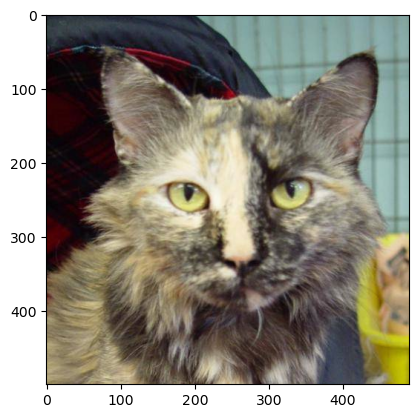

In [8]:
plt.imshow(cat_rgb)

In [9]:
#now we can see the actual image color because opencv ki library read image in bgr

In [10]:
type(cat)

numpy.ndarray

In [11]:
cat.shape #ooper image me x axis and yaxis mai show horaha 

(499, 489, 3)

In [12]:
dog=cat=cv2.imread('C:\\Users\\hinaa\\Documents\\ML_Projects\\cats_dogs\\training_set\\training_set\\dogs\\dog.1.jpg')

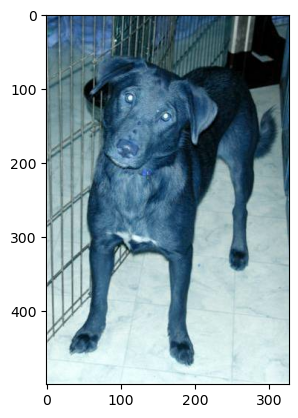

In [13]:
plt.imshow(dog)

In [14]:
dog.shape

(499, 327, 3)

In [15]:
#Agar to image bari h to shrink hojaye ki or choti h to enlarge hojayegi

# Image Manipulation

# Data Augmentation

In [16]:
#aik image sa bohat sari images banana rotation waghera apply ka k

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
img_gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.1, rescale=1/255, height_shift_range=0.1, shear_range=0.2, fill_mode='wrap')

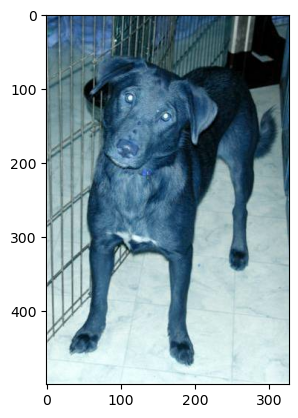

In [19]:
plt.imshow(dog)

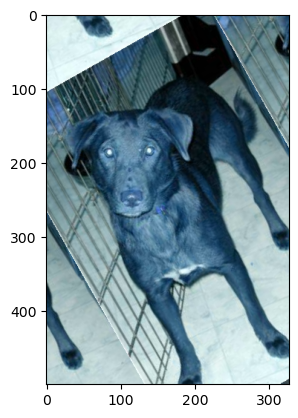

In [20]:
plt.imshow(img_gen.random_transform(dog))

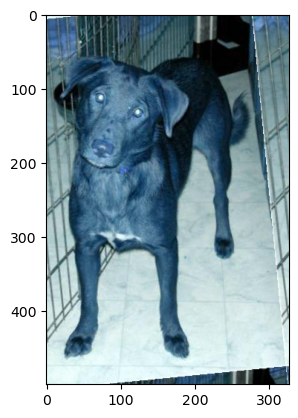

In [21]:
plt.imshow(img_gen.random_transform(dog))

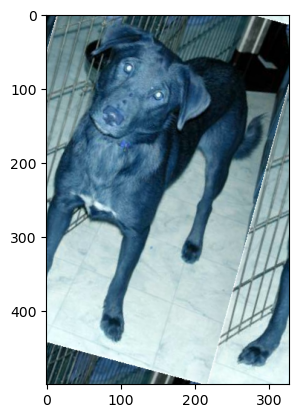

In [22]:
plt.imshow(img_gen.random_transform(dog))

# Getting Data from Local Drive

In [23]:
img_gen.flow_from_directory('C:\\Users\\hinaa\\Documents\\ML_Projects\\cats_dogs\\training_set\\training_set')

Found 8005 images belonging to 2 classes.


In [24]:
img_gen.flow_from_directory('C:\\Users\\hinaa\\Documents\\ML_Projects\\cats_dogs\\test_set\\test_set')

Found 2023 images belonging to 2 classes.


# Reshaping Images

In [25]:
image_shape=(200,200,3)

# Creating Model

In [26]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D

In [36]:
#we check the layers through research paper k kitni layers sa acha result ata h
#pictures hamaray pass 2D arrays ki form mai hoti hai 
#ham activation function chnage bhi karsaktay h in each layer

# Define the model
models = Sequential()

# Add layers to the model
models.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
models.add(MaxPool2D(pool_size=(2, 2)))

models.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
models.add(MaxPool2D(pool_size=(2, 2)))

models.add(Conv2D(filters=40, kernel_size=(7, 7), activation='relu'))
models.add(MaxPool2D(pool_size=(2, 2)))

models.add(Flatten())

models.add(Dense(128))
models.add(Activation('relu'))

models.add(Dropout(0.5))

# Add another Dropout layer
models.add(Dropout(0.3))  # Adjust the dropout rate as needed

# Output layer
models.add(Dense(1, activation='sigmoid'))

In [37]:
models.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
models.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 95, 95, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 40)          │         125,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,048,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,225,897 (8.49 MB)

 Trainable params: 2,225,897 (8.49 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [39]:
batch_size=16 #hamaray pass total bohat zayada images h to ham batch mai data model ko detay h 16 images pehlay forward and backward  progogate thats why we create batches. aik aik image daingay to bohat time lagay ga 
#jitna bara batch size hoga utn ajaldi model train hoga
#batch size ap k computer k ram pai depend karta so dehan rakhna k batch size zayada bara na ho 
#maximum batch size could be  depend on computer 

In [40]:
train_img_gen=img_gen.flow_from_directory( 'C:\\Users\\hinaa\\Documents\\ML_Projects\\cats_dogs\\training_set\\training_set',
                                          target_size=(200,200), #image ko reshape karay ga height or width model ko denay sa pehlay
                                          batch_size=batch_size,
                                          class_mode='binary'

)

Found 8005 images belonging to 2 classes.


In [41]:
test_img_gen=img_gen.flow_from_directory( 'C:\\Users\\hinaa\\Documents\\ML_Projects\\cats_dogs\\test_set\\test_set',
                                          target_size=image_shape[:2], #image ko reshape karay ga height or width model ko denay sa pehlay
                                          batch_size=batch_size,
                                          class_mode='binary'

)

Found 2023 images belonging to 2 classes.


In [42]:
train_img_gen.class_indices #model na khud sa 0 cats ko diya or 1 dogs ko

{'cats': 0, 'dogs': 1}

In [44]:
results = models.fit(train_img_gen, epochs=25, steps_per_epoch=20, validation_data=test_img_gen, validation_steps=12)
#if let say we have 9000 images and our batch size is 16 so 9000/ 16 = 581 so steps per epoch ham model ko keg=h rahy k wo hamari images 150 time dekhay instaed of 581
#agar ham jaldi model ko chLana chahtay ham chahtay h randomly cheezo ko uthao or dai do 

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 726ms/step - accuracy: 0.5028 - loss: 0.6927 - val_accuracy: 0.5156 - val_loss: 0.6929
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 786ms/step - accuracy: 0.4743 - loss: 0.6935 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 768ms/step - accuracy: 0.5007 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 651ms/step - accuracy: 0.5301 - loss: 0.6924 - val_accuracy: 0.5312 - val_loss: 0.6929
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 629ms/step - accuracy: 0.5334 - loss: 0.6928 - val_accuracy: 0.4792 - val_loss: 0.6933
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 647ms/step - accuracy: 0.4271 - loss: 0.6937 - val_accuracy: 0.5104 - val_loss: 0.6931
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 595ms/step - accuracy: 0.4539 - loss: 0.6934 - val_accuracy: 0.4479 - val_loss: 0.6932
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 639ms/step - accuracy: 0.5604 - loss: 0.6927 - val_accu

In [ ]:
#model apnay ap ko khud correct karta without human intervention
#accuracy flactuate karti hai

# Running Inference

In [ ]:
#yaha model ban gaya h ab is mai image dai k is ko test karna h lakin input shape same dena h jo ooper diya tha 

In [65]:
models.save('catsdogs.h5')

In [66]:
train_img_gen.class_indices

{'cats': 0, 'dogs': 1}

In [67]:
import numpy as np
from keras.preprocessing import image

In [68]:
dog='C:\\Users\\hinaa\\Documents\\ML_Projects\\cats_dogs\\test_set\\test_set\\dogs\\dog.4014.jpg'

In [69]:
type(dog)

str

In [70]:
dog_img= image.load_img(dog, target_size=(200,200))

In [71]:
type(dog_img)

PIL.Image.Image

In [72]:
dog_img=image.img_to_array(dog_img)

In [73]:
dog_img.shape

(200, 200, 3)

In [74]:
dog_img=np.expand_dims(dog_img, axis=0)

In [75]:
dog_img.shape

(1, 200, 200, 3)

# Importing model

In [76]:
from keras.models import load_model

In [77]:
epoch_20=load_model('catsdogs.h5')

In [78]:
prediction_prob=epoch_20.predict(dog_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [79]:
print(prediction_prob)

[[0.49170583]]
